# LAB 06 - 서브플롯

- 하나의 그래픽 영역을나우어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다


## 전국 실업률 분포 변화
- unempltment_age 데이터는 2000 년부터 2022년 까지 행정구역(시도)/연령별 실업률을 담고 있다. 이 데이터를 토대로 지역별 실업률이 어떻게 변화하고 있는지 확인해보자

### #01. 준비작업

#### 1-1 패키지 참조

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np
from pandas import melt,pivot_table

#### 1-2 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [3]:
origin = load_data('unemployment_age')
origin.head()

[data] https://data.hossam.kr/data/lab06_/unemployment_age.xlsx
[desc] 2000년부터 2022년까지 행정구역(시도)/연령별 실업률 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,NaN,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,NaN,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,NaN,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


### #02. 데이터 전처리

#### 2-1 시 이름에 대한 결측치 처리
- ffill() 을 이용하면 이전 값으로 채워줄 수 있다

In [4]:
df = origin.copy()
df['시도별'] = df['시도별'].ffill()
df.head(10)

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2
5,부산광역시,60세이상,5.3,3.6,2.1,1.5,1.0,2.8,3.1,2.8,...,2.6,2.4,2.6,2.8,3.6,2.9,3.9,3.7,3.3,2.8
6,대구광역시,15-29세,9.1,9.8,9.2,9.8,8.6,8.7,9.5,8.9,...,9.9,11.5,10.1,12.0,11.5,12.2,8.3,9.0,7.1,6.9
7,대구광역시,30-59세,3.7,3.5,2.8,3.0,3.2,3.2,2.5,2.4,...,2.1,2.5,2.2,2.5,2.7,2.9,2.9,3.0,2.8,2.1
8,대구광역시,60세이상,0.7,1.2,1.4,2.2,1.6,2.5,1.6,2.0,...,2.2,2.1,2.5,3.8,3.4,3.7,3.1,3.2,4.6,2.9
9,인천광역시,15-29세,8.2,8.2,7.9,8.8,8.3,8.3,9.2,8.3,...,9.3,12.1,11.8,11.5,10.5,9.2,9.0,8.6,7.9,6.7


### #03. 시각화

#### 3-1 년도에 따른 전국 평균 실업률 변화

In [5]:
# (1) 데이터 전처리 - 데이터 재구조화

df2 = melt(df,id_vars = ['시도별','연령계층별'],var_name = '년도',value_name ='실업률')
df2.head(10)

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
5,부산광역시,60세이상,2000,5.3
6,대구광역시,15-29세,2000,9.1
7,대구광역시,30-59세,2000,3.7
8,대구광역시,60세이상,2000,0.7
9,인천광역시,15-29세,2000,8.2


In [6]:
#시/도에 따른 년도별 평균 실업률
tdf1=df2[['시도별','년도','실업률']].groupby(['시도별','년도'], as_index=False).mean()
tdf1

,시도별,년도,실업률
0,강원도,2000,2.766667
1,강원도,2001,2.333333
2,강원도,2002,2.100000
3,강원도,2003,2.566667
4,강원도,2004,2.633333
...,...,...,...
386,충청북도,2018,3.400000
387,충청북도,2019,4.200000
388,충청북도,2020,4.466667
389,충청북도,2021,3.433333


In [7]:
#전국에 대한 년도별 평균 실업률
tdf2 = tdf1[['년도','실업률']].groupby('년도').mean()
tdf2

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


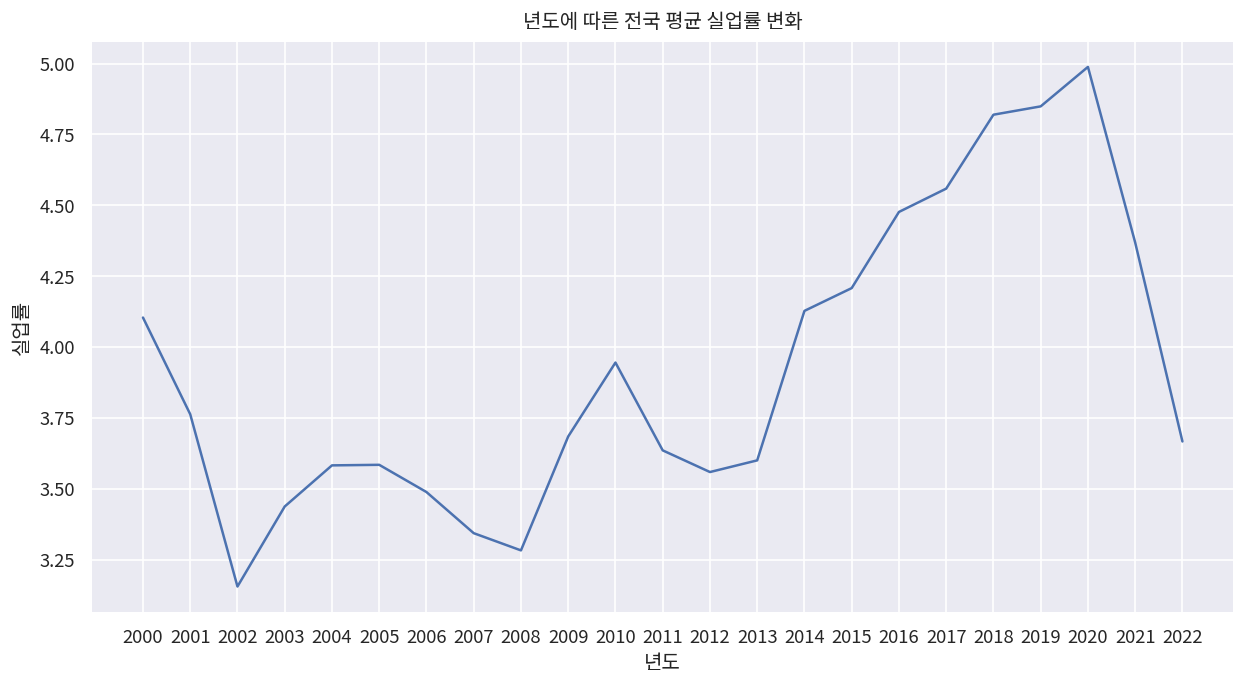

In [8]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=tdf2, x=tdf2.index, y='실업률'

)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
ax.set_title('년도에 따른 전국 평균 실업률 변화', fontsize=12, pad=8)


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


- 2000년 이후 증감을 반복하는 모습을 보이지만 전체적으로 증가하는 추세
- 2020년 이후 급격히 감소함

#### 3-2 년도에 따른 연령대별 전국 평균 실업률 변화

In [9]:
#데이터 전처리
gdf = df2.filter(['년도','연령계층별','실업률']).groupby(['년도','연령계층별'],as_index=False).mean()

gdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


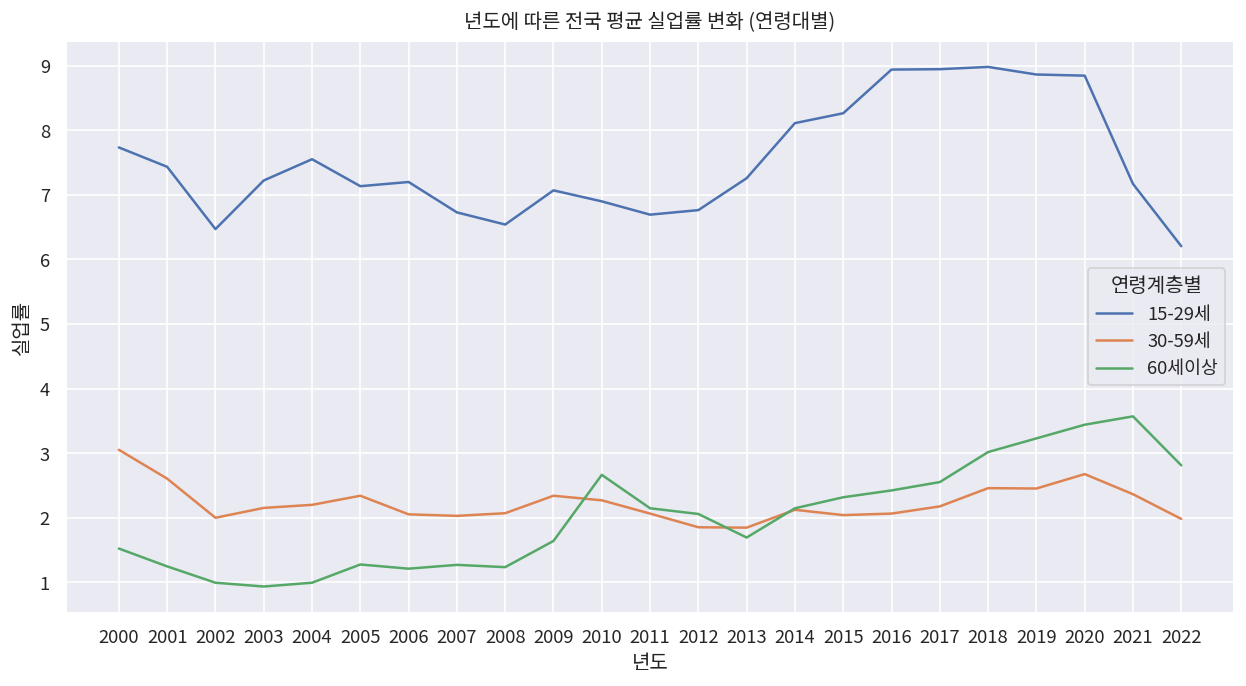

In [10]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=gdf, x='년도', y='실업률',hue='연령계층별'

)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
ax.set_title('년도에 따른 전국 평균 실업률 변화 (연령대별)', fontsize=12, pad=8)


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #04. 두 그래프를 서브플롯으로 구현

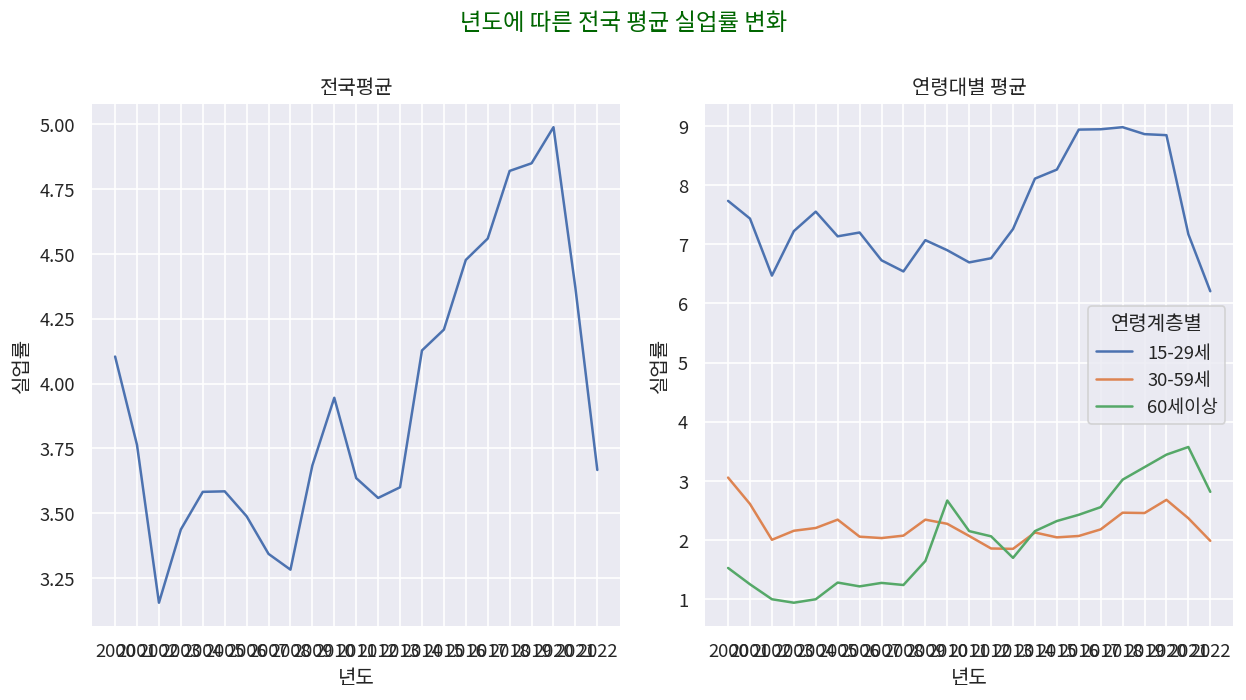

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)

 # ax 객체가 행,열 수에 따라서 리스트가 된다.
 #               = [fig, [ax1, ax2]]
fig, [ax1, ax2] = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.lineplot(data=tdf2, x=tdf2.index, y="실업률", ax=ax1)
sb.lineplot(data=gdf, x='년도', y='실업률', hue='연령계층별', ax=ax2)
 # 3) 그래프 꾸미기
# 전체 제목
fig.suptitle('년도에 따른 전국 평균 실업률 변화', fontsize=14, 
color='#006600')
 # 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)
ax1.title.set_text("전국평균")
ax1.title.set_fontsize(12)
ax1.grid()
ax2.title.set_text("연령대별 평균")
ax2.title.set_fontsize(12)
ax2.grid()

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료
